Change the PIL version from 9.4.0 to 6.2.2

In [ ]:
import PIL
print('PIL',PIL.__version__)

In [ ]:
!pip install "pillow<7"

The DCL code folder must be on the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change the below location to where the DCL code folder is located on your Drive

In [ ]:
%cd /content/drive/MyDrive/ECE570/DCL-master

/content/drive/MyDrive/ECE570/DCL-master


In [ ]:
!pip install pretrainedmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=449ee1a3565730b69a504524e1b7f304cf3051874ff66410e775029b25d7fa93
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built pretrainedmodels


In [ ]:
import os
os. getcwd()

'/content/drive/MyDrive/ECE570/DCL-master'

## Downloading the Dataset

1. Download the zip file for the dataset from the Caltech Data by Caltech Library using this link: https://data.caltech.edu/records/65de6-vp158

2. Upload the zip file to the Drive location.

Extract the contents of the .tgz file

In [ ]:
import tarfile

# Define the file path and name
file_path = "CUB_200_2011.tgz"

# Extract the .tgz file
with tarfile.open(file_path, "r:gz") as tar:
    tar.extractall()

The files will be extracted to a folder called CUB_200_2011 which has the different species of bird images in their specific folders. All the images from all the folders will need to be extracted to the destination location as shown below:

In [ ]:
import os
import shutil

rootdir = '/content/drive/MyDrive/ECE570/DCL-master/CUB_200_2011/images'
destination = '/content/drive/MyDrive/ECE570/DCL-master/dataset/CUB_200_2011/data'

for subdirs, dirs, files in os.walk(rootdir):
    for file in files:
        print('file', file)
        print('subdirs', subdirs)
        src_path = os.path.join(subdirs, file)
        dst_path = os.path.join(destination, file)
        print(src_path, dst_path)
        shutil.move(src_path, dst_path)

## Checking if a particular image file is not in the folder on moving the dataset to the required location


In [ ]:
folder_path = "/content/drive/MyDrive/ECE570/DCL-master/dataset/CUB_200_2011/data"
file_name = "Pileated_Woodpecker_0033_180179.jpg"

file_path = os.path.join(folder_path, file_name)

if os.path.exists(file_path):
    print(f"The file '{file_name}' exists in the folder.")
else:
    print(f"The file '{file_name}' does not exist in the folder.")

The file 'Pileated_Woodpecker_0033_180179.jpg' does not exist in the folder.


## Counting the Number of Files in the Dataset (It should be 11788 for the CUB Dataset)

In [ ]:
import os
import shutil

rootdir = '/content/drive/MyDrive/ECE570/DCL-master/CUB_200_2011/images'
destination = '/content/drive/MyDrive/ECE570/DCL-master/dataset/CUB_200_2011/data'

for subdirs, dirs, files in os.walk(rootdir):
    for file in files:
        src_path = os.path.join(subdirs, file)
        dst_path = os.path.join(destination, file)

        try:
            shutil.copy(src_path, dst_path)
            # print(f"Moved '{file}' from '{subdirs}' to '{destination}'.")
        except Exception as e:
            print(f"Failed to move '{file}': {str(e)}")

In [ ]:
path = '/content/drive/MyDrive/ECE570/DCL-master/dataset/CUB_200_2011/data'

# import os

_, _, files = next(os.walk(path))
file_count = len(files)

In [ ]:
file_count

11788

## My Implementation of Region Confusion Mechanism

In [ ]:
from IPython.lib.display import join
import matplotlib.pyplot as plt
import numpy as np
import torch
import math
import random
from PIL import Image, ImageOps, ImageEnhance, PILLOW_VERSION

def swap(img, crop):
    def crop_image(image, cropnum):
        width, high = image.size
        crop_x = [int((width / cropnum[0]) * i) for i in range(cropnum[0] + 1)]
        crop_y = [int((high / cropnum[1]) * i) for i in range(cropnum[1] + 1)]
        im_list = []
        for j in range(len(crop_y) - 1):
            for i in range(len(crop_x) - 1):
                im_list.append(image.crop((crop_x[i], crop_y[j], min(crop_x[i + 1], width), min(crop_y[j + 1], high))))
        return im_list

    widthcut, highcut = img.size
    img = img.crop((10, 10, widthcut-10, highcut-10))
    images = crop_image(img, crop)

    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes[0].set_title('Original Image')
    axes[0].imshow(np.array(img))

    count = 0
    for k in [1,3,5,7]:
      count += 1

      shuffled_image = []

      tmpx = []
      tmpy = []
      pro = 5
      if pro >= 5:
        for j in range(crop[0]*crop[1]):

            tmpx.append(images[j])
            if len(tmpx) == crop[0]:
              # Generate a random vector qj for row j
              qj = np.arange(1,crop[0] + 1) + np.random.randint(-k, k + 1, crop[0])

              # Sort qj to get permutation σ_row_j
              sigma_row_j = np.argsort(qj)

              # print(sigma_row_j)

              # Apply the permutation σ_row_j to shuffle regions in row j
              # tmp = np.array(tmpx)
              shuffled = []
              for m in sigma_row_j:
                  # print(m)
                  # print(len(tmpx))
                  shuffled.append(tmpx[m])
                  # print(shuffled.size)
              # shuffled = shuffled.tolist()

              tmpy.append(shuffled)
              tmpx = []
              print(tmpy)

      # print(tmpy.size)
        random_im = []
        for line in tmpy:
            random_im.extend(line)

        width, high = img.size
        iw = int(width / crop[0])
        ih = int(high / crop[1])
        toImage = Image.new('RGB', (iw * crop[0], ih * crop[1]))
        x = 0
        y = 0
        for i in random_im:
            i = i.resize((iw, ih), Image.ANTIALIAS)
            toImage.paste(i, (x * iw, y * ih))
            x += 1
            if x == crop[0]:
                x = 0
                y += 1
      else:
          toImage = img
          toImage = toImage.resize((widthcut, highcut))

      axes[count].set_title(f'Shuffled Image (k = {k})')
      axes[count].imshow(np.array(toImage))
    plt.show()

    return shuffled_image

[[<PIL.Image.Image image mode=RGB size=44x68 at 0x7AE90B906A10>, <PIL.Image.Image image mode=RGB size=45x68 at 0x7AE90B905C90>, <PIL.Image.Image image mode=RGB size=45x68 at 0x7AE90B905B70>, <PIL.Image.Image image mode=RGB size=45x68 at 0x7AE90B904B20>, <PIL.Image.Image image mode=RGB size=45x68 at 0x7AE90B906B30>, <PIL.Image.Image image mode=RGB size=45x68 at 0x7AE90B907BB0>, <PIL.Image.Image image mode=RGB size=45x68 at 0x7AE90B907820>]]
[[<PIL.Image.Image image mode=RGB size=44x68 at 0x7AE90B906A10>, <PIL.Image.Image image mode=RGB size=45x68 at 0x7AE90B905C90>, <PIL.Image.Image image mode=RGB size=45x68 at 0x7AE90B905B70>, <PIL.Image.Image image mode=RGB size=45x68 at 0x7AE90B904B20>, <PIL.Image.Image image mode=RGB size=45x68 at 0x7AE90B906B30>, <PIL.Image.Image image mode=RGB size=45x68 at 0x7AE90B907BB0>, <PIL.Image.Image image mode=RGB size=45x68 at 0x7AE90B907820>], [<PIL.Image.Image image mode=RGB size=44x69 at 0x7AE90B907E50>, <PIL.Image.Image image mode=RGB size=45x69 at 0x

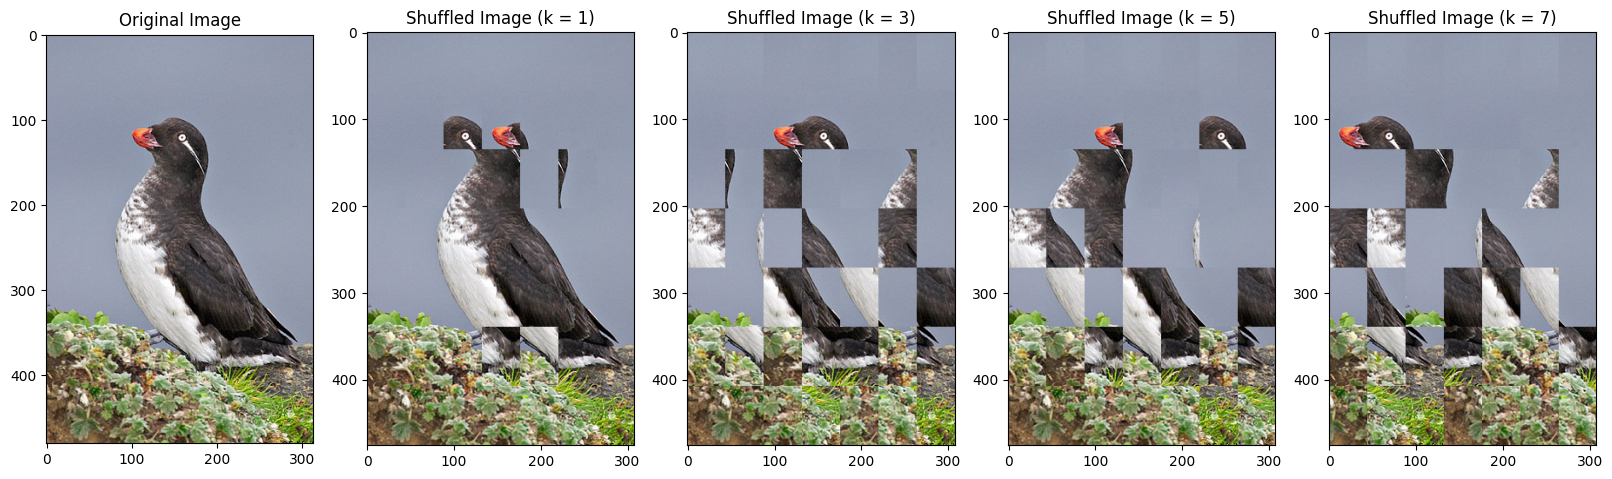

[]

In [ ]:
img = "/content/drive/MyDrive/ECE570/DCL-master/CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0001_795972.jpg"
img = Image.open(img)
swap(img, (7,7))

## Paper's Original Region Confusion Mechanism Implementation

In [ ]:
from IPython.lib.display import join
import matplotlib.pyplot as plt
import numpy as np
import torch
import math
import random
from PIL import Image, ImageOps, ImageEnhance, PILLOW_VERSION

def swap(img, crop):
    def crop_image(image, cropnum):
        width, high = image.size
        crop_x = [int((width / cropnum[0]) * i) for i in range(cropnum[0] + 1)]
        crop_y = [int((high / cropnum[1]) * i) for i in range(cropnum[1] + 1)]
        im_list = []
        for j in range(len(crop_y) - 1):
            for i in range(len(crop_x) - 1):
                im_list.append(image.crop((crop_x[i], crop_y[j], min(crop_x[i + 1], width), min(crop_y[j + 1], high))))
        return im_list

    # probability = 0.5
    widthcut, highcut = img.size
    img = img.crop((10, 10, widthcut-10, highcut-10))
    images = crop_image(img, crop)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].set_title('Original Image')
    axes[0].imshow(np.array(img))


    pro = 5
    if pro >= 5:
        tmpx = []
        tmpy = []
        count_x = 0
        count_y = 0
        k = 1
        # RAN = random.randint(-2,2)
        RAN = 2
        print(RAN)
        for i in range(crop[1] * crop[0]):
            tmpx.append(images[i])
            count_x += 1
            if len(tmpx) >= k:
                tmp = tmpx[count_x - RAN:count_x]
                random.shuffle(tmp)
                tmpx[count_x - RAN:count_x] = tmp
            if count_x == crop[0]:
                tmpy.append(tmpx)
                count_x = 0
                count_y += 1
                tmpx = []
            if len(tmpy) >= k:
                tmp2 = tmpy[count_y - RAN:count_y]
                random.shuffle(tmp2)
                tmpy[count_y - RAN:count_y] = tmp2
        random_im = []
        print(len(tmpy))
        for line in tmpy:
            random_im.extend(line)

        width, high = img.size
        iw = int(width / crop[0])
        ih = int(high / crop[1])
        toImage = Image.new('RGB', (iw * crop[0], ih * crop[1]))
        x = 0
        y = 0
        for i in random_im:
            i = i.resize((iw, ih), Image.ANTIALIAS)
            toImage.paste(i, (x * iw, y * ih))
            x += 1
            if x == crop[0]:
                x = 0
                y += 1
    else:
        toImage = img
        toImage = toImage.resize((widthcut, highcut))

    axes[1].set_title('Shuffled Image')
    axes[1].imshow(np.array(toImage))
    plt.show()

    return toImage

2
7


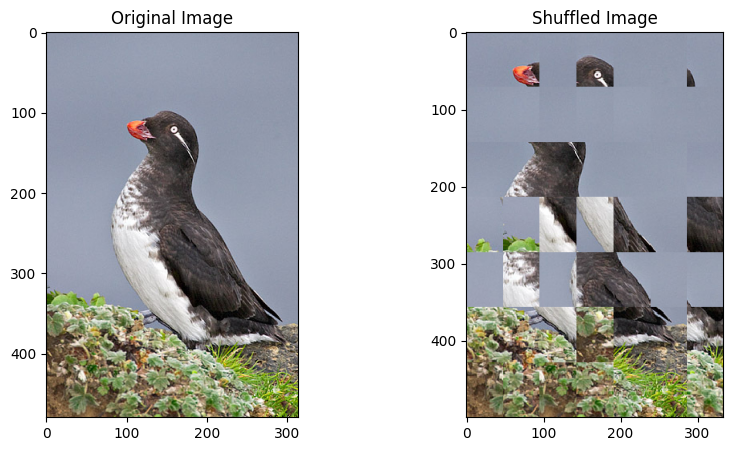

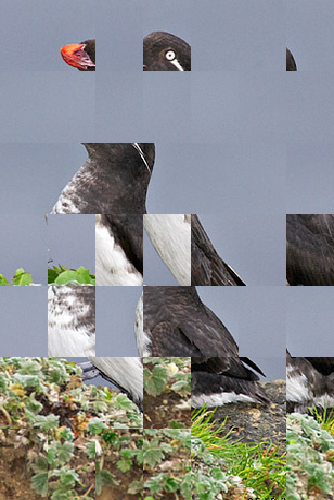

In [ ]:
img = "/content/drive/MyDrive/ECE570/DCL-master/CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0001_795972.jpg"
img = Image.open(img)
swap(img, (7,7))